In [2]:
# Imports
import copy
import matplotlib.pyplot as plt

%pip install imageio

# Importing the supportive functions from additional files
from Utilities.input_gen_utils import *  # Input generation
from Utilities.format_utils import *     # Formatting values for prettier printing

# The implementation of Simplex algrithm with counts.
from simplex_with_counts import *
from simplex import simplex

# Mainly used for visualizing input distributions as a pixel matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


Note: you may need to restart the kernel to use updated packages.


/var/folders/3x/zbbhfv350l7g455kz77dzgzh0000gn/T/ipykernel_10155/230366337.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad=-(size*1.7))


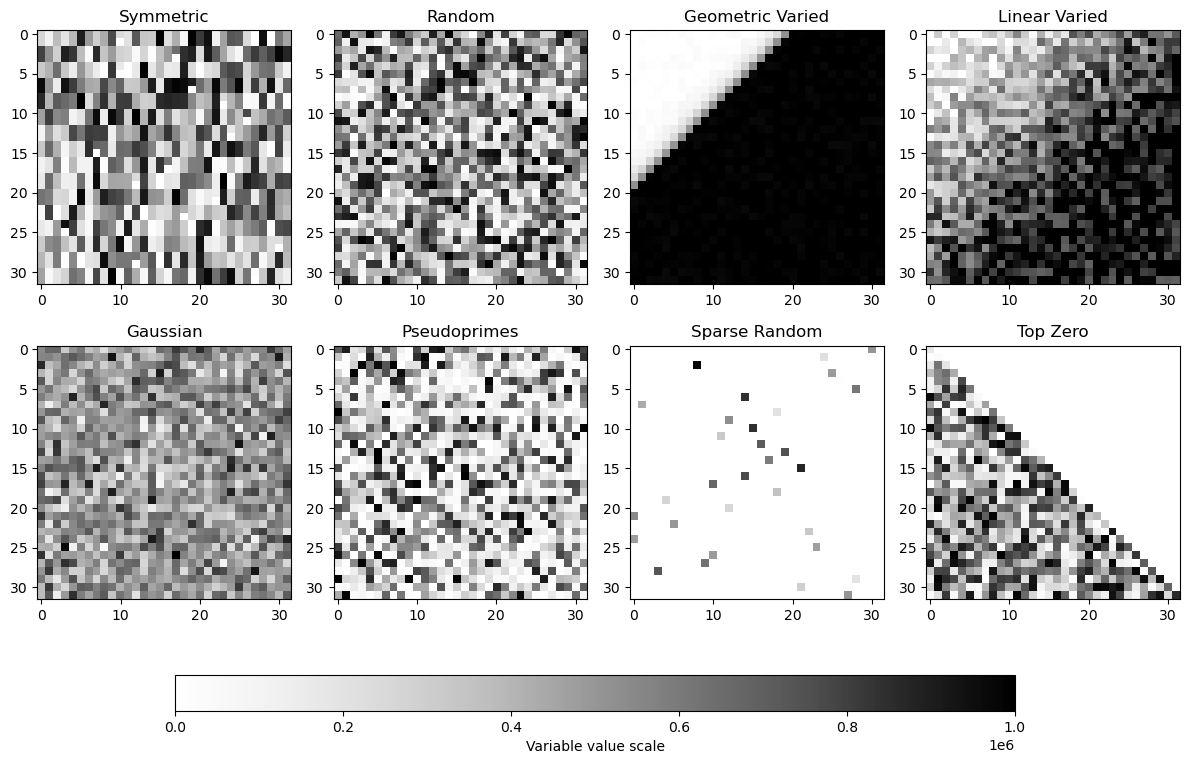

In [13]:
# Configuration for simplex input generation
min_value = 1
max_value = 1000000
size = 32  # This assumes both 'inequalities' and 'variables' should be set to 'size'
sparsity_rate = 0.97  # Example sparsity rate

# Dictionary of functions and handling conditions
input_generation_functions = {
    'Symmetric': generate_symmetric_simplex_input,
    'Random': generate_random_simplex_input,
    'Geometric Varied': generate_varied_geometric_simplex_input,
    'Linear Varied': generate_varied_linear_simplex_input,
    # 'Prime': generate_input_with_only_primes,
    'Gaussian': generate_gaussian_simplex_input,
    'Pseudoprimes': generate_pseudoprime_simplex_input,
    'Sparse Random': generate_random_simplex_input,
    'Top Zero': generate_random_simplex_input,
    # 'Geometric Shuffled': generate_geometric_simplex_input
}

# Setup for plot
fig, axes = plt.subplots(2, 4, figsize=(12, 18))  # Adjusted for fewer subplots
axes = axes.flatten()

# Normalize the color scale
norm = Normalize(vmin=0, vmax=max_value)

# Generate and display each matrix
for ax, (label, gen_func) in zip(axes, input_generation_functions.items()):
    try:
        if 'Sparse' in label:
            A, b, c = gen_func(size, size, min_value, max_value)
            b, c = make_sparse_simplex_input(b, c, sparsity_rate)
        elif 'Top Zero' in label:
            A, b, c = gen_func(size, size, min_value, max_value)
            b = make_diagonal_zeros(b, True)
        else:
            A, b, c = gen_func(size, size, min_value, max_value)

        # Display the data
        im = ax.imshow(b, cmap='Greys', norm=norm)
        ax.set_title(label)
    except Exception as e:
        print(f"Error with {label}: {e}")
        ax.imshow(np.zeros((size, size)), cmap='Greys')  # Show an empty grid on error
        ax.set_title(f"{label} (Error)")
        ax.axis('off')

plt.subplots_adjust()  # Adjust the height spacing
cbar_ax = fig.add_axes([0.15, 0.28, 0.7, 0.02])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='Variable value scale')

plt.tight_layout(h_pad=-(size*1.7))
plt.show()